<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
! pip install plotly

In [63]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import random
import random


In [58]:
# Cargar datos
path = 'C:/Bases_kl/reviews_vidjew_es.csv '
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [60]:
ks = []
k_inertias = []

for k in range(1,19):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_

    ks.append(k)
    k_inertias.append(k_inertia)

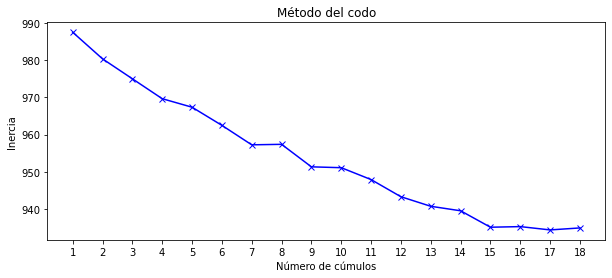

In [9]:
plt.figure(figsize=(10,4))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.xticks(range(20))
plt.plot(ks, k_inertias, 'bx-');


###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [66]:
k = 8
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,1
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,5
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,7
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,7
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,7
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,3
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,7
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,0


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [68]:
#obtener los centroides
#len(model.cluster_centers_)
random.seed(8)

nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)
#Número de documentos para cada cluster
clust_cnt = data['cluster'].value_counts()
#Porcentaje de los documentos que perteneen a cada cluster
clust_cnt_pct =data['cluster'].value_counts(normalize=True)
#Obtengo el número de centroides
centroides = model.cluster_centers_

#Almacenamiento de las palabras más representativas
terms = tfidf_vect.get_feature_names()
#Ordenar la lista de las palabras de los centroides de mayor a menor 
order_centroides = centroides.argsort()[:, ::-1]

#Obtener los vecinos más cercanos de cada centroide
for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroides[i][:20]:
        print(terms[ind], end=" ") 
        print()
        print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()


Cluster # 0
Tiene 428 registros (42.80% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
juego 

si 

bonitos 

regalo 

foto 

día 

hijo 

jugar 

mando 

pulsera 

gustado 

tiempo 

aunque 

bonita 

llegó 

plata 

llego 

encantado 

español 

solo 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** No me ha gustado el juego.

 *** Un juego para mi hijo. No se ha pasado mucho tiempo jugando con él. No puedo opinar mucho más sobre este juego.

 *** Juego en español, envío rápido


********************************************

Cluster # 1
Tiene 90 registros (9.00% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
calidad 

buena 

precio 

mala 

bastante 

regalo 

compra 

buen 

relación 

gustado 

baja 

demasiado 

bien 

poca 

cierre 

recomiendo 

producto 

botones 

pulsera 

gusto 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Calidad precio muy buena

 *** Calidad precio buena

 *** Calidad precio buena


********************************************

Cluster # 2
Tiene 55 registros (5.50% de los datos)


In [103]:
len(terms)

3666

In [71]:
clusters = {0: 'Expectativas sobre eljuego',
            1: "Calidad - Precio",
            2: 'Expectativas sobre el producto',
            3: 'Precio',
            4: 'Tamaño',
            5: 'Satisfacción con el producto',
            6: 'Incumplimientoen la entrega',
            7: 'beneficio vs Costo'}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,nombres_clusters
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,1,Calidad - Precio
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,5,Satisfacción con el producto
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0,Expectativas sobre eljuego
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,7,beneficio vs Costo
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,7,beneficio vs Costo
...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,7,beneficio vs Costo
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,3,Precio
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,7,beneficio vs Costo
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,0,Expectativas sobre eljuego


In [72]:
df_centroides = pd.DataFrame(centroides)
df_centroides['cluster'] = clusters.values()
df_centroides


,0,1,2,3,4,5,6,7,8,9,...,3657,3658,3659,3660,3661,3662,3663,3664,3665,cluster
0,7.475059e-04,-1.301043e-18,1.084202e-19,-8.131516e-20,-1.084202e-18,4.716368e-04,-1.301043e-18,4.071646e-04,8.084630e-04,1.394118e-03,...,7.589415e-19,-8.131516e-20,3.847476e-04,1.626303e-19,7.284737e-04,3.610811e-04,2.710505e-19,3.293421e-03,1.566769e-03,Expectativas sobre eljuego
1,-5.421011e-19,4.336809e-19,5.421011e-20,5.421011e-20,2.284145e-03,0.000000e+00,-1.084202e-19,-2.710505e-20,5.421011e-20,2.168404e-19,...,1.084202e-19,5.421011e-20,-2.710505e-20,-2.168404e-19,1.084202e-19,4.771573e-03,5.421011e-20,4.336809e-19,-2.168404e-19,Calidad - Precio
2,-3.252607e-19,1.936184e-02,5.421011e-20,2.710505e-20,5.421011e-20,2.168404e-19,1.084202e-19,2.710505e-20,5.421011e-20,1.084202e-19,...,1.084202e-19,2.710505e-20,-2.710505e-20,-5.421011e-20,0.000000e+00,-2.168404e-19,1.084202e-19,3.167677e-03,0.000000e+00,Expectativas sobre el producto
3,-3.252607e-19,4.336809e-19,5.421011e-20,2.710505e-20,-5.421011e-20,0.000000e+00,0.000000e+00,0.000000e+00,5.421011e-20,0.000000e+00,...,0.000000e+00,2.710505e-20,-2.710505e-20,-1.084202e-19,0.000000e+00,-2.168404e-19,5.421011e-20,4.501944e-03,0.000000e+00,Precio
4,1.174926e-03,3.450658e-03,1.084202e-19,1.254406e-03,0.000000e+00,1.692037e-03,1.306334e-03,-5.421011e-20,5.421011e-20,4.336809e-19,...,4.336809e-19,1.254406e-03,5.421011e-20,-2.168404e-19,1.084202e-19,2.168404e-19,2.396606e-03,4.336809e-19,3.768242e-03,Tamaño
5,-1.084202e-19,0.000000e+00,5.421011e-20,0.000000e+00,-5.421011e-20,0.000000e+00,0.000000e+00,2.710505e-20,0.000000e+00,0.000000e+00,...,1.675529e-02,0.000000e+00,-2.710505e-20,-5.421011e-20,-5.421011e-20,6.822856e-03,5.421011e-20,0.000000e+00,6.788838e-03,Satisfacción con el producto
6,-3.252607e-19,4.336809e-19,3.774172e-03,5.421011e-20,0.000000e+00,3.325796e-03,6.641052e-03,0.000000e+00,0.000000e+00,2.168404e-19,...,0.000000e+00,5.421011e-20,0.000000e+00,-1.084202e-19,1.084202e-19,0.000000e+00,5.421011e-20,3.030393e-03,0.000000e+00,Incumplimientoen la entrega
7,3.758207e-03,-2.168404e-19,1.084202e-19,5.421011e-20,1.820264e-03,1.250981e-03,-4.336809e-19,-5.421011e-20,5.421011e-20,4.336809e-19,...,5.421011e-19,5.421011e-20,8.131516e-20,2.716421e-03,2.168404e-19,1.634994e-03,-5.421011e-20,8.493687e-04,-6.505213e-19,beneficio vs Costo


###  `[BONUS: 3 pts]` Visualización usando PCA

In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

In [78]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.nombres_clusters.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'Expectativas sobre eljuego': 'blue',
             'Calidad - Precio': 'yellow',
             'Expectativas sobre el producto': 'green',
             'Precio': 'red',
             'Tamaño': 'white',
             'Satisfacción con el producto': 'black',
             'Incumplimiento en la entrega': 'sky blue',
             'beneficio vs Costo': 'purple'}

result['colores'] = result['cluster'].map(colorsIdx)

result.head()

,X,Y,cluster,texto,colores
0,0.486622,-0.320770,Calidad - Precio,"Buen. Buena calidad, y buena presentación.",yellow
1,-0.106860,-0.146478,Satisfacción con el producto,"Un producto a perfecto, para salir de casa con...",black
2,-0.071082,-0.028486,Expectativas sobre eljuego,No funciona con Nintendo Switch. No hay forma ...,blue
3,0.031667,0.235384,beneficio vs Costo,"Recomendado, los utilizo para pc y no me dan n...",purple
4,0.016381,0.098544,beneficio vs Costo,El cable funciona bien podria ser un poco mas ...,purple


In [76]:
#Visualización de los categorias
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)


# Comparación

### `[BONUS 15 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [95]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
documento1=[test[0]]
documento2=[test[1]]

In [96]:
#predicción con el modelo (K-means)
documento1_trans= tfidf_vect.transform(documento1)
clusters[model.predict(documento1_trans)[0]]

'Expectativas sobre eljuego'

In [97]:
documento2_trans= tfidf_vect.transform(documento2)
clusters[model.predict(documento2_trans)[0]]

'Calidad - Precio'

In [ ]:
#Predicción con el modelo ()

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

In [ ]:
Según los resultados del  𝐾 -Means, ¿cuál es la estructura de los datos?: el número de palabras más representativas

In [ ]:
¿Qué diferencia notó entre los resultados del taller pasado y este?:
    El modelo (k-means) además de las palabras más representativas podemos tener los documentos más representativas.
    Adicionalmente con base en los recurso antes mencionados podemos determinar las categorias de clasifiación de cada
    uno de los documentos.
    
    En el taller pasado podiamos calcular metricas de evaluación delmodelo lo cual permitia conocer la exactitud, precisión
    del modelo.
    De otra parte teniamos la posibilidad de dividir nuestro conjunto de datos en datos de entrenamiento y prueba. 
    
    